# **C√¢ncer de Tire√≥ide**

## **1. Introdu√ß√£o**

O c√¢ncer de tireoide √© uma das neoplasias mais comuns, e sua detec√ß√£o precoce √© essencial para um tratamento eficaz e melhores resultados progn√≥sticos. Com o crescimento das ferramentas de an√°lise de dados e machine learning, surgem novas oportunidades para aprimorar os m√©todos de diagn√≥stico e prever a evolu√ß√£o da doen√ßa. Este projeto tem como objetivo construir um modelo capaz de prever o c√¢ncer de tireoide. Para isso, iremos utilizar a Regress√£o Log√≠stica.

In [1]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set();

In [4]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/PortfoÃÅlio/Dados/Thyroid_Diff.csv')

In [5]:
# Visualizando base de dados

dados.head()

Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

**Fonte:** https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data

**Features**

* **Age:** The age of the patient at the time of diagnosis or treatment.

* **Gender:** The gender of the patient (male or female).

* **Smoking:** Whether the patient is a smoker or not.

* **Hx Smoking:** Smoking history of the patient (e.g., whether they have ever smoked).

* **Hx Radiotherapy:** History of radiotherapy treatment for any condition.

* **Thyroid Function:** The status of thyroid function, possibly indicating if there are any abnormalities.

* **Physical Examination:** Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

* **Adenopathy:** Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

* **Pathology:** Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

* **Focality:** Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

* **Risk:** The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

* **T:** Tumor classification based on its size and extent of invasion into nearby structures.

* **N:** Nodal classification indicating the involvement of lymph nodes.

* **M:** Metastasis classification indicating the presence or absence of distant metastases.

* **Stage:** The overall stage of the cancer, typically determined by combining T, N, and M classifications.

* **Response:** Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

* **Recurred:** Indicates whether the cancer has recurred after initial treatment.

## **2. An√°lise Explorat√≥ria de Dados**

In [6]:
# Informa√ß√µes sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

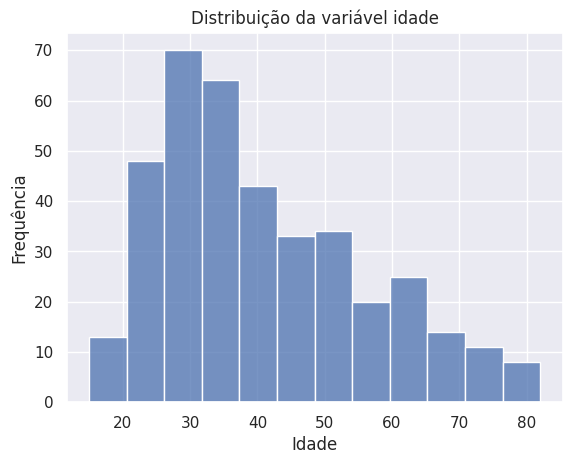

In [7]:
# Gr√°fico 1: distribui√ß√£o da vari√°vel idade

sns.histplot(dados['Age'])

plt.title('Distribui√ß√£o da vari√°vel idade')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')

plt.show();

**Observa√ß√£o 1**

O histograma da vari√°vel idade apresenta uma distribui√ß√£o assim√©trica √† direita (skewness positiva), com um pico de frequ√™ncia entre 30 e 40 anos e uma cauda longa que se estende at√© 80 anos. A maioria dos indiv√≠duos est√° concentrada entre 20 e 50 anos, com uma queda acentuada ap√≥s os 50 anos e poucos indiv√≠duos acima de 70 anos. Essa distribui√ß√£o sugere que a amostra √© predominantemente composta por indiv√≠duos jovens e de meia-idade. A assimetria da distribui√ß√£o indica que medidas de tend√™ncia central como a mediana (em torno de 40 anos) s√£o mais apropriadas do que a m√©dia para descrever a idade t√≠pica.

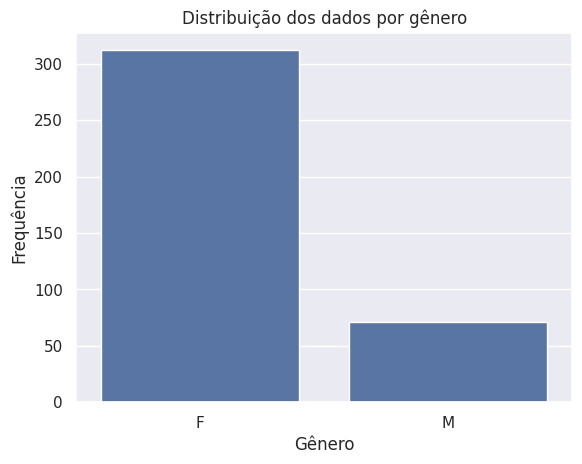

In [8]:
# Gr√°fico 2: distribui√ß√£o dos dados por g√™nero

sns.countplot(x = 'Gender', data = dados)

plt.title('Distribui√ß√£o dos dados por g√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Frequ√™ncia')

plt.show();

**Observa√ß√£o 2**

A distribui√ß√£o de frequ√™ncia por g√™nero mostra um desequil√≠brio: o g√™nero feminino (F) apresenta uma frequ√™ncia pr√≥xima de 300, enquanto o g√™nero masculino (M) est√° em torno de 50, resultando em uma propor√ß√£o de 6:1. Do ponto de vista estat√≠stico, esse desbalanceamento pode introduzir vi√©s em an√°lises que assumem representatividade equitativa entre g√™neros, como testes de diferen√ßa de m√©dias ou modelos de regress√£o.

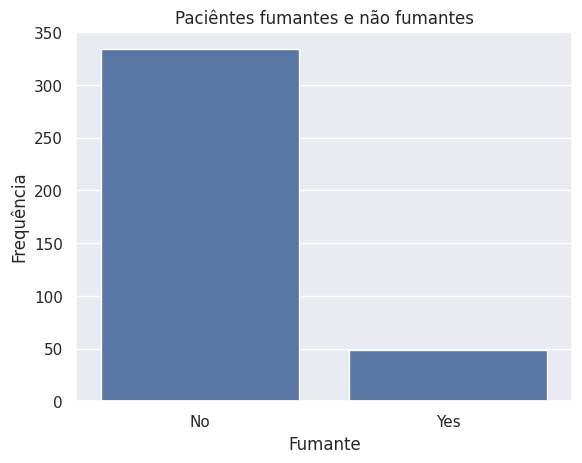

In [9]:
# Gr√°fico 3: Paci√™ntes fumantes e n√£o fumantes

sns.countplot(x = 'Smoking', data = dados)

plt.title('Paci√™ntes fumantes e n√£o fumantes')
plt.xlabel('Fumante')
plt.ylabel('Frequ√™ncia')

plt.show();

**Observa√ß√£o 3**

O histograma de frequ√™ncia de pacientes fumantes e n√£o fumantes revela uma distribui√ß√£o desbalanceada. A categoria "N√£o fumante" apresenta uma frequ√™ncia de aproximadamente 300 indiv√≠duos, enquanto a categoria "Fumante" possui cerca de 50, indicando uma propor√ß√£o de aproximadamente 6:1. Essa distribui√ß√£o sugere que o h√°bito de fumar √© pouco prevalente na amostra, o que pode ser reflexo de um vi√©s de sele√ß√£o (por exemplo, pacientes de uma cl√≠nica com foco em sa√∫de preventiva) ou de uma popula√ß√£o com baixa exposi√ß√£o ao tabagismo. Para fins estat√≠sticos, esse desequil√≠brio pode impactar an√°lises inferenciais, como testes de associa√ß√£o entre tabagismo e outras vari√°veis, devido ao tamanho reduzido da classe minorit√°ria.

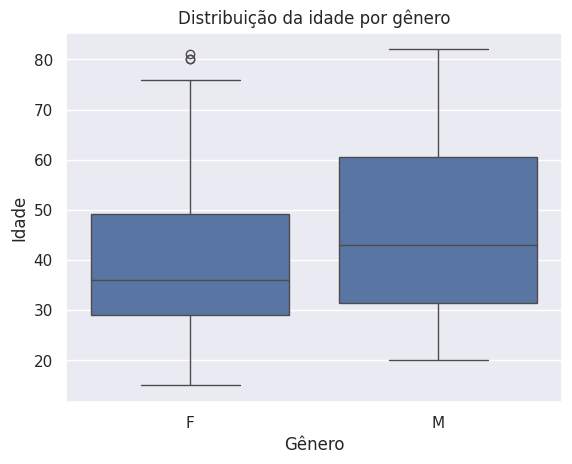

In [10]:
# Gr√°fico 4: distribui√ß√£o da idade por g√™nero

sns.boxplot(x = 'Gender', y = 'Age', data = dados)

plt.title('Distribui√ß√£o da idade por g√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Idade')

plt.show();

**Observa√ß√£o 4**

O boxplot da distribui√ß√£o da idade por g√™nero revela diferen√ßas not√°veis entre os grupos. Para o g√™nero feminino (F), a mediana da idade √© aproximadamente 40 anos, com um intervalo interquartil (IQR) de 30 a 50 anos e presen√ßa de outliers acima de 70 anos. J√° para o g√™nero masculino (M), a mediana est√° em torno de 50 anos, com IQR de 40 a 60 anos, sem outliers vis√≠veis. A diferen√ßa nas medianas sugere que os homens na amostra s√£o, em m√©dia, mais velhos que as mulheres. Al√©m disso, a maior dispers√£o no grupo feminino (IQR mais amplo e outliers) indica maior variabilidade et√°ria entre as mulheres.

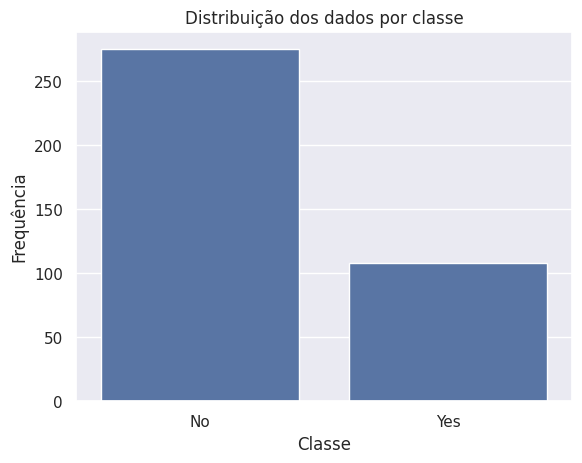

In [11]:
# Gr√°fico 5: Distribui√ß√£o dos dados por classe

sns.countplot(x = 'Recurred', data = dados)

plt.title('Distribui√ß√£o dos dados por classe')
plt.xlabel('Classe')
plt.ylabel('Frequ√™ncia')

plt.show();

**Observa√ß√£o 5**

O histograma mostra uma distribui√ß√£o desbalanceada: a classe "N√£o" tem uma frequ√™ncia de cerca de 250, enquanto "Sim" apresenta aproximadamente 100, uma propor√ß√£o de 2,5:1. Essa distribui√ß√£o indica que a maioria dos pacientes na amostra n√£o tem c√¢ncer de tireoide, o que pode refletir uma amostra de triagem ou um estudo com uma popula√ß√£o de baixo risco. Esse desequil√≠brio √© comum em datasets m√©dicos, especialmente para doen√ßas com preval√™ncia relativamente baixa, como o c√¢ncer de tireoide, mas pode impactar a performance de modelos de classifica√ß√£o, levando a um vi√©s para a classe majorit√°ria ("N√£o").

## **3. Pr√©-Processamento de Dados**

In [12]:
# Convertendo vari√°vel target para num√©rica

dados['Recurred'] = dados['Recurred'].map({'No': 0, 'Yes': 1})

In [13]:
# Separando os dados em previsores e classe

previsores = dados.drop('Recurred', axis = 1)
classe = dados['Recurred']

In [14]:
# Verificando multicolinearidade

## Inst√¢nciando objeto
scaler = MinMaxScaler()
label = LabelEncoder()

## Aplicando aos dados
previsores[['Age']] = scaler.fit_transform(previsores[['Age']])

previsores['Gender'] = label.fit_transform(previsores[['Gender']])
previsores['Smoking'] = label.fit_transform(previsores[['Smoking']])
previsores['Hx Smoking'] = label.fit_transform(previsores[['Hx Smoking']])
previsores['Hx Radiothreapy'] = label.fit_transform(previsores[['Hx Radiothreapy']])
previsores['Thyroid Function'] = label.fit_transform(previsores[['Thyroid Function']])
previsores['Physical Examination'] = label.fit_transform(previsores[['Physical Examination']])
previsores['Adenopathy'] = label.fit_transform(previsores[['Adenopathy']])
previsores['Pathology'] = label.fit_transform(previsores[['Pathology']])
previsores['Focality'] = label.fit_transform(previsores[['Focality']])
previsores['Risk'] = label.fit_transform(previsores[['Risk']])
previsores['T'] = label.fit_transform(previsores[['T']])
previsores['N'] = label.fit_transform(previsores[['N']])
previsores['M'] = label.fit_transform(previsores[['M']])
previsores['Stage'] = label.fit_transform(previsores[['Stage']])
previsores['Response'] = label.fit_transform(previsores[['Response']])

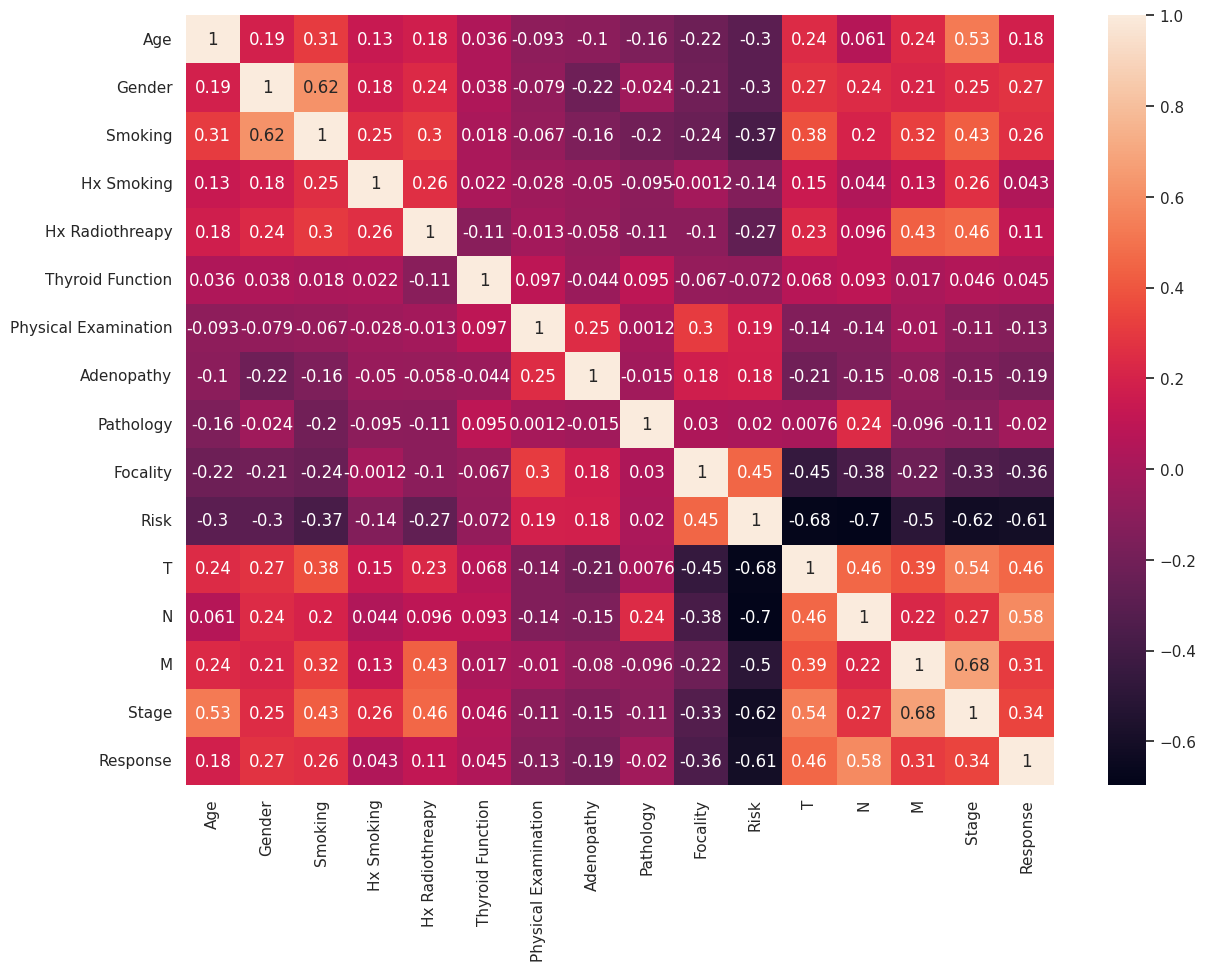

In [15]:
# Verificando correla√ß√£o entre as vari√°veis graficamente

plt.figure(figsize=(14, 10))
sns.heatmap(previsores.corr(), annot = True)
plt.show();

**Observa√ß√£o 6:**

A an√°lise da matriz de correla√ß√£o revelou correla√ß√µes significativas entre vari√°veis independentes, indicando a presen√ßa de multicolinearidade, que pode comprometer a estabilidade e a interpretabilidade do modelo de regress√£o log√≠stica. As correla√ß√µes fortes (valor absoluto ‚â• 0.7) observadas foram:

* **Risk e T:** -0.680255
* **Risk e N:** -0.696764
* **Stage e M:** 0.681019

Al√©m disso, correla√ß√µes moderadas (entre 0.5 e 0.7) refor√ßam a redund√¢ncia entre as vari√°veis:

* **Stage e T:** 0.538309
* **Stage e Risk:** -0.619415
* **Risk e Response:** -0.606071
* **N e Response:** 0.583809

Essas correla√ß√µes sugerem que Stage e Risk s√£o vari√°veis derivadas, que agregam informa√ß√µes j√° capturadas por T, N, e M, componentes do sistema de estadiamento TNM.

Com base na an√°lise, as vari√°veis Stage e Risk foram selecionadas para remo√ß√£o pelos seguintes motivos:

* **Stage:** Esta vari√°vel representa uma combina√ß√£o de T (tamanho/invas√£o do tumor), N (envolvimento linfonodal), M (met√°stases distantes), e, em alguns casos, Age, conforme o sistema TNM. Sua forte correla√ß√£o com M (0.681019) e correla√ß√µes moderadas com T (0.538309) e Risk (-0.619415) indicam que ela √© redundante, pois suas informa√ß√µes j√° est√£o contidas nas vari√°veis mais granulares (T, N, M).

* **Risk:** A categoria de risco √© derivada de fatores como tamanho do tumor (T), envolvimento linfonodal (N), met√°stases (M), e histologia (Pathology). Suas correla√ß√µes fortes com T (-0.680255) e N (-0.696764) sugerem que ela agrega pouco valor preditivo al√©m do que essas vari√°veis j√° fornecem.

A remo√ß√£o das vari√°veis Stage e Risk √© justificada pela sua redund√¢ncia com T, N, e M, confirmada pelas altas correla√ß√µes observadas na matriz de correla√ß√£o e pelo contexto cl√≠nico do sistema TNM. Essa decis√£o promove um modelo de regress√£o log√≠stica mais est√°vel, interpretable e eficiente, mantendo as vari√°veis mais granulares para prever a recorr√™ncia do c√¢ncer de tireoide.

**Removendo Vari√°veis Com Multicolinearidade**

In [16]:
# C√≥pia dos dados originais
dataset = dados.copy()

# Separando os dados em previsores(X) e classe(Y)
## E removendo as vari√°veis com multicolinearidade
inputs = dataset.drop(['Recurred', 'Stage', 'Risk'], axis = 1)
target = dataset['Recurred']

# Salvando nomes das vari√°veis categ√≥ricas
nomes_cols_categoricas = inputs.select_dtypes(include = 'object').columns.tolist()

In [17]:
# Aplicando OneHotEncoder

## Carregando biblioteca
from sklearn.preprocessing import OneHotEncoder

## Inst√¢nciando objeto
onehot = OneHotEncoder(sparse_output = False)

## Aplicando a vari√°veis de entrada
onehot.fit(inputs[nomes_cols_categoricas])
onehot_cols = onehot.get_feature_names_out(nomes_cols_categoricas)
inputs[onehot_cols] = onehot.transform(inputs[nomes_cols_categoricas])

In [18]:
# Separando os dados em Previsores(X) e Classe(y)

## Concatenando informa√ß√µes e criando um novo dataframe
dataset_final = pd.concat([inputs['Age'],
                           inputs[onehot_cols]],
                          axis=1)

## Escalonando Vari√°vel Age
dataset_final['Age'] = scaler.fit_transform(dataset_final[['Age']])

## Separando os dados
X = dataset_final     # independent
y = target            # dependent

In [19]:
# Visualizando dados

dataset_final.head()

Age  Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
0  0.179104       1.0       0.0         1.0          0.0            1.0   
1  0.283582       1.0       0.0         1.0          0.0            0.0   
2  0.223881       1.0       0.0         1.0          0.0            1.0   
3  0.701493       1.0       0.0         1.0          0.0            1.0   
4  0.701493       1.0       0.0         1.0          0.0            1.0   

   Hx Smoking_Yes  Hx Radiothreapy_No  Hx Radiothreapy_Yes  \
0             0.0                 1.0                  0.0   
1             1.0                 1.0                  0.0   
2             0.0                 1.0                  0.0   
3             0.0                 1.0                  0.0   
4             0.0                 1.0                  0.0   

   Thyroid Function_Clinical Hyperthyroidism  ...  T_T4b  N_N0  N_N1a  N_N1b  \
0                                        0.0  ...    0.0   1.0    0.0    0.0   
1                                        0.0  ...    0.0   1.0    0.0    0.0   
2                                        0.0  ...    0.0   1.0    0.0    0.0   
3                                        0.0  ...    0.0   1.0    0.0    0.0   
4                                        0.0  ...    0.0   1.0    0.0    0.0   

   M_M0  M_M1  Response_Biochemical Incomplete  Response_Excellent  \
0   1.0   0.0                              0.0                 0.0   
1   1.0   0.0                              0.0                 1.0   
2   1.0   0.0                              0.0                 1.0   
3   1.0   0.0                              0.0                 1.0   
4   1.0   0.0                              0.0                 1.0   

   Response_Indeterminate  Response_Structural Incomplete  
0                     1.0                             0.0  
1                     0.0                             0.0  
2                     0.0                             0.0  
3                     0.0                             0.0  
4                     0.0                             0.0  

[5 rows x 47 columns]

In [20]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 0)

In [21]:
# Aplicando smote para balancear os dados

## Carregando biblioteca
from imblearn.over_sampling import SMOTE

## Instanciando objeto
smote = SMOTE(random_state = 0)

## Balanceando dados
X_treino, y_treino = smote.fit_resample(X_treino, y_treino)

In [22]:
# Verificando distribui√ß√£o dos dados

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(448, 47)
(77, 47)
(448,)
(77,)


## **4. Construindo Modelo**

In [23]:
# Carregando biblioteca

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [24]:
# Instanciando o modelo

modelo = LogisticRegression(max_iter = 1000)

In [25]:
# Definindo a grade de hiperpar√¢metros

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

In [26]:
# Configurando GridSearchCV com valida√ß√£o cruzada estratificada

grid_search = GridSearchCV(
    estimator = modelo,
    param_grid = param_grid,
    cv = StratifiedKFold(n_splits = 10,
                         shuffle = True,
                         random_state = 0),
    n_jobs=-1
)

In [27]:
# Ajustando o modelo com GridSearchCV

grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [28]:
# Exibindo os melhores hiperpar√¢metros

print("\nMelhores hiperpar√¢metros encontrados:")
print(grid_search.best_params_)


Melhores hiperpar√¢metros encontrados:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
# Obter o melhor modelo

modelo_ajustado = grid_search.best_estimator_

In [30]:
# Valida√ß√£o Cruzada
print("\n## Valida√ß√£o Cruzada")

## Calcular m√©tricas com valida√ß√£o cruzada (F1-score, recall, precis√£o)

# F1-Score
cv_scores_f1 = cross_val_score(modelo_ajustado,
                               previsores,
                               classe,
                               cv = StratifiedKFold(n_splits = 10,
                                                    shuffle = True,
                                                    random_state = 0),
                               scoring = 'f1')
# Recall
cv_scores_recall = cross_val_score(modelo_ajustado,
                                   previsores,
                                   classe,
                                   cv=StratifiedKFold(n_splits = 10,
                                                      shuffle = True,
                                                      random_state = 0),
                                   scoring = 'recall')
# Precision
cv_scores_precision = cross_val_score(modelo_ajustado,
                                      previsores,
                                      classe,
                                      cv=StratifiedKFold(n_splits = 10,
                                                         shuffle = True,
                                                         random_state = 0),
                                      scoring = 'precision')

print("\nM√©tricas da Valida√ß√£o Cruzada (10 dobras):")
print(f"F1-Score: {cv_scores_f1.mean():.4f} ¬± Desvio Padr√£o: {cv_scores_f1.std():.4f}")
print(f"Recall: {cv_scores_recall.mean():.4f} ¬± Desvio Padr√£o: {cv_scores_recall.std():.4f}")
print(f"Precis√£o: {cv_scores_precision.mean():.4f} ¬± Desvio Padr√£o: {cv_scores_precision.std():.4f}")


## Valida√ß√£o Cruzada

M√©tricas da Valida√ß√£o Cruzada (10 dobras):
F1-Score: 0.8212 ¬± Desvio Padr√£o: 0.0713
Recall: 0.8145 ¬± Desvio Padr√£o: 0.0912
Precis√£o: 0.8338 ¬± Desvio Padr√£o: 0.0789


In [31]:
# Realizando previs√µes

previsoes = modelo_ajustado.predict(X_teste)

## **5. Avaliando Modelo**

In [32]:
# Avaliando Desempenho do Modelo com Classification Report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



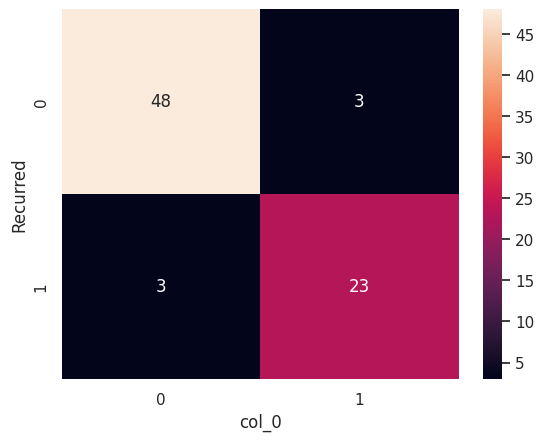

In [33]:
# Plotando Matriz de Confus√£o

sns.heatmap(pd.crosstab(y_teste, previsoes),
            annot = True,
            fmt = 'd')
plt.show();

# **Considera√ß√µes Finais**

üìå Considera√ß√µes Finais

Este estudo demonstrou a import√¢ncia de uma an√°lise explorat√≥ria profunda e da escolha cuidadosa de modelos para o diagn√≥stico de c√¢ncer de tireoide. A Regress√£o Log√≠stica, mesmo sendo um modelo simples e amplamente utilizado, se mostrou eficaz para lidar com os dados cl√≠nicos, oferecendo bons resultados em termos de acur√°cia, precis√£o e recall, especialmente em um contexto desbalanceado.

üîë Principais insights:

A an√°lise explorat√≥ria revelou a necessidade de lidar com vari√°veis desbalanceadas e multicolineares, o que influenciou diretamente a escolha do modelo e a elimina√ß√£o de vari√°veis redundantes.

A remo√ß√£o de vari√°veis derivadas como Stage e Risk mostrou-se crucial para melhorar a estabilidade e a interpretabilidade do modelo, permitindo um entendimento mais claro dos coeficientes.

üîç Implica√ß√µes do estudo:

A abordagem com Regress√£o Log√≠stica pode ser uma excelente ferramenta em cen√°rios cl√≠nicos onde a interpretabilidade do modelo √© t√£o importante quanto sua precis√£o. Mesmo com um modelo simples, a compreens√£o do dom√≠nio cl√≠nico aliada ao rigor estat√≠stico trouxe uma contribui√ß√£o significativa ao estudo.

üí° Poss√≠veis melhorias:

Embora a Regress√£o Log√≠stica tenha atendido bem √†s necessidades do projeto, √© poss√≠vel explorar outros modelos, como √Årvores de Decis√£o ou Random Forest, para comparar o desempenho em termos de classifica√ß√£o, especialmente para detectar padr√µes mais complexos no comportamento dos dados.

Por fim, este projeto n√£o s√≥ refor√ßa o valor da ci√™ncia de dados na √°rea da sa√∫de, mas tamb√©m destaca como t√©cnicas simples podem ser extremamente eficazes quando combinadas com um bom entendimento do problema e das caracter√≠sticas dos dados.